In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, f1_score, recall_score, precision_score
import xgboost as xgb
from tensorflow.keras.datasets import fashion_mnist
import numpy as np

In [3]:
def load_data():
    """
    Load Fashion MNIST dataset and split into training and testing sets.
    Returns:
        Tuple: (x_train, y_train), (x_test, y_test)
    """
    (x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
    return (x_train, y_train), (x_test, y_test)

In [4]:
def show_sample_images(x_train, y_train):
    """
    Display sample images from the dataset.
    Args:
        x_train (numpy array): Training images.
        y_train (numpy array): Training labels.
    """
    plt.figure(figsize=(10, 10))
    for i in range(4):
        plt.subplot(2, 2, i+1)
        plt.imshow(x_train[i], cmap='gray')
        plt.title(f'Label: {y_train[i]}')
        plt.colorbar()
        plt.grid(False)
    plt.show()

In [5]:
def custom_scaling(x_train, x_test):
    """
    Scale the images to a range of -1 to 1.
    Args:
        x_train (numpy array): Training images.
        x_test (numpy array): Testing images.
    Returns:
        Tuple: Scaled x_train and x_test.
    """
    x_train_scaled = (x_train - 127.5) / 127.5
    x_test_scaled = (x_test - 127.5) / 127.5
    return x_train_scaled, x_test_scaled

In [6]:
def visualize_images(x_train, num_images=50):
    """
    Visualize a specified number of images with different colormaps.
    Args:
        x_train (numpy array): Training images.
        num_images (int): Number of images to visualize.
    """
    plt.figure(figsize=(30, 60))
    colormaps = ['viridis', 'plasma', 'inferno', 'magma', 'cividis', 'jet', 'rainbow', 'ocean', 'gist_earth', 'terrain']
    for i in range(num_images):
        plt.subplot(10, 5, i+1)
        plt.imshow(x_train[i], cmap=colormaps[i % len(colormaps)])
        plt.title(colormaps[i % len(colormaps)], fontsize=10)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
    plt.tight_layout()
    plt.show()


In [7]:
def preprocess_data(x_train, x_test):
    """
    Flatten images for use in classifiers.
    Args:
        x_train (numpy array): Scaled training images.
        x_test (numpy array): Scaled testing images.
    Returns:
        Tuple: Flattened x_train and x_test.
    """
    x_train_flat = x_train.reshape(x_train.shape[0], -1)
    x_test_flat = x_test.reshape(x_test.shape[0], -1)
    return x_train_flat, x_test_flat


In [8]:
def train_and_evaluate_model(model, x_train, y_train, x_test, y_test):
    """
    Train and evaluate a given model.
    Args:
        model: Machine learning model.
        x_train (numpy array): Training data.
        y_train (numpy array): Training labels.
        x_test (numpy array): Testing data.
        y_test (numpy array): Testing labels.
    """
    model.fit(x_train, y_train)
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred, average='weighted')
    recall = recall_score(y_test, y_test_pred, average='weighted')
    precision = precision_score(y_test, y_test_pred, average='weighted')
    
    print(f"Training accuracy: {train_accuracy:.4f}")
    print(f"Test accuracy: {test_accuracy:.4f}")
    print(f"F1 score: {f1:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"Precision: {precision:.4f}")
    print("Classification report:")
    print(classification_report(y_test, y_test_pred))

In [9]:
def train_knn(x_train, y_train, x_test, y_test):
    """
    Train K-Nearest Neighbors classifier and evaluate performance.
    Args:
        x_train (numpy array): Flattened, scaled training images.
        y_train (numpy array): Training labels.
        x_test (numpy array): Flattened, scaled testing images.
        y_test (numpy array): Testing labels.
    """
    knn = KNeighborsClassifier()
    train_and_evaluate_model(knn, x_train, y_train, x_test, y_test)

In [10]:
def train_random_forest(x_train, y_train, x_test, y_test):
    """
    Train Random Forest classifier and evaluate performance.
    Args:
        x_train (numpy array): Flattened, scaled training images.
        y_train (numpy array): Training labels.
        x_test (numpy array): Flattened, scaled testing images.
        y_test (numpy array): Testing labels.
    """
    rf_model = RandomForestClassifier(n_estimators=50, random_state=42)
    train_and_evaluate_model(rf_model, x_train, y_train, x_test, y_test)

In [11]:
def train_decision_tree(x_train, y_train, x_test, y_test):
    """
    Train Decision Tree classifier and evaluate performance.
    Args:
        x_train (numpy array): Flattened, scaled training images.
        y_train (numpy array): Training labels.
        x_test (numpy array): Flattened, scaled testing images.
        y_test (numpy array): Testing labels.
    """
    dt_model = DecisionTreeClassifier(random_state=42)
    train_and_evaluate_model(dt_model, x_train, y_train, x_test, y_test)

In [12]:
def train_svm(x_train, y_train, x_test, y_test):
    """
    Train Support Vector Machine classifier and evaluate performance.
    Args:
        x_train (numpy array): Flattened, scaled training images.
        y_train (numpy array): Training labels.
        x_test (numpy array): Flattened, scaled testing images.
        y_test (numpy array): Testing labels.
    """
    svm_model = SVC(kernel='rbf', random_state=42)
    train_and_evaluate_model(svm_model, x_train, y_train, x_test, y_test)


In [13]:
def train_xgboost(x_train, y_train, x_test, y_test):
    """
    Train XGBoost classifier and evaluate performance.
    Args:
        x_train (numpy array): Flattened, scaled training images.
        y_train (numpy array): Training labels.
        x_test (numpy array): Flattened, scaled testing images.
        y_test (numpy array): Testing labels.
    """
    x_train = x_train.reshape((-1, 28*28)) / 255.0
    x_test = x_test.reshape((-1, 28*28)) / 255.0

    dtrain = xgb.DMatrix(x_train, label=y_train)
    dtest = xgb.DMatrix(x_test, label=y_test)

    param = {'max_depth': 6, 'eta': 0.3, 'objective': 'multi:softmax', 'num_class': 10}
    num_round = 100
    bst = xgb.train(param, dtrain, num_round)

    y_train_pred = bst.predict(dtrain)
    y_test_pred = bst.predict(dtest)

    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    print(f"Training accuracy: {train_accuracy:.4f}")
    print(f"Test accuracy: {test_accuracy:.4f}")
    print("Classification report:")
    print(classification_report(y_test, y_test_pred))

In [14]:
def train_gradient_boosting(x_train, y_train, x_test, y_test):
    """
    Train Gradient Boosting classifier and evaluate performance.
    Args:
        x_train (numpy array): Flattened, scaled training images.
        y_train (numpy array): Training labels.
        x_test (numpy array): Flattened, scaled testing images.
        y_test (numpy array): Testing labels.
    """
    gb_model = GradientBoostingClassifier(n_estimators=50, learning_rate=0.3, random_state=42)
    train_and_evaluate_model(gb_model, x_train, y_train, x_test, y_test)


In [15]:
# Load data
(x_train, y_train), (x_test, y_test) = load_data()

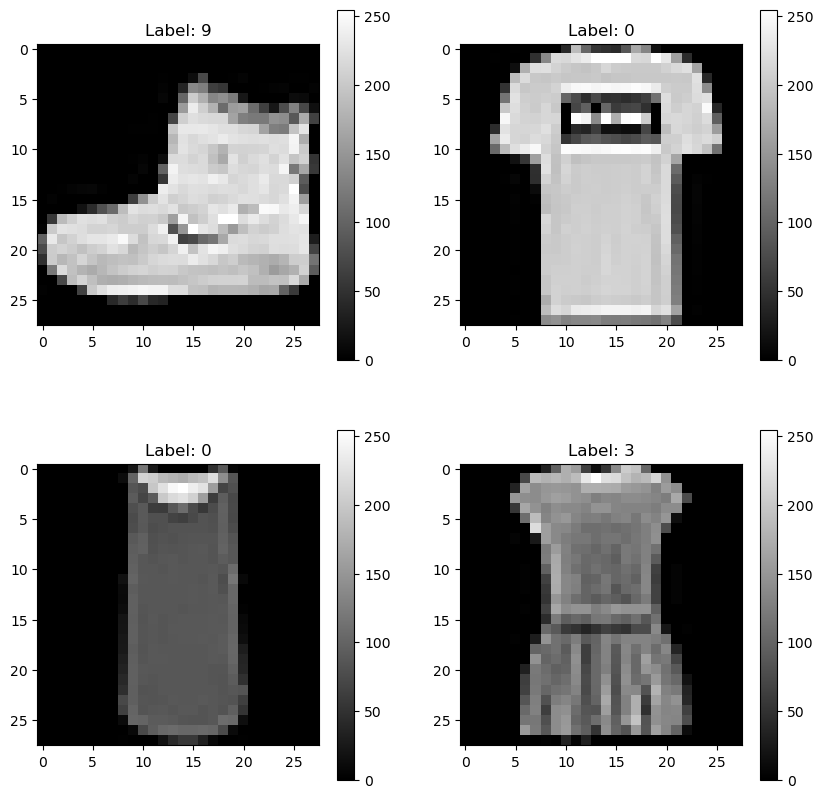

In [16]:
# Display sample images
show_sample_images(x_train, y_train)

In [17]:
# Scale images to -1 to 1 range
x_train_scaled, x_test_scaled = custom_scaling(x_train, x_test)

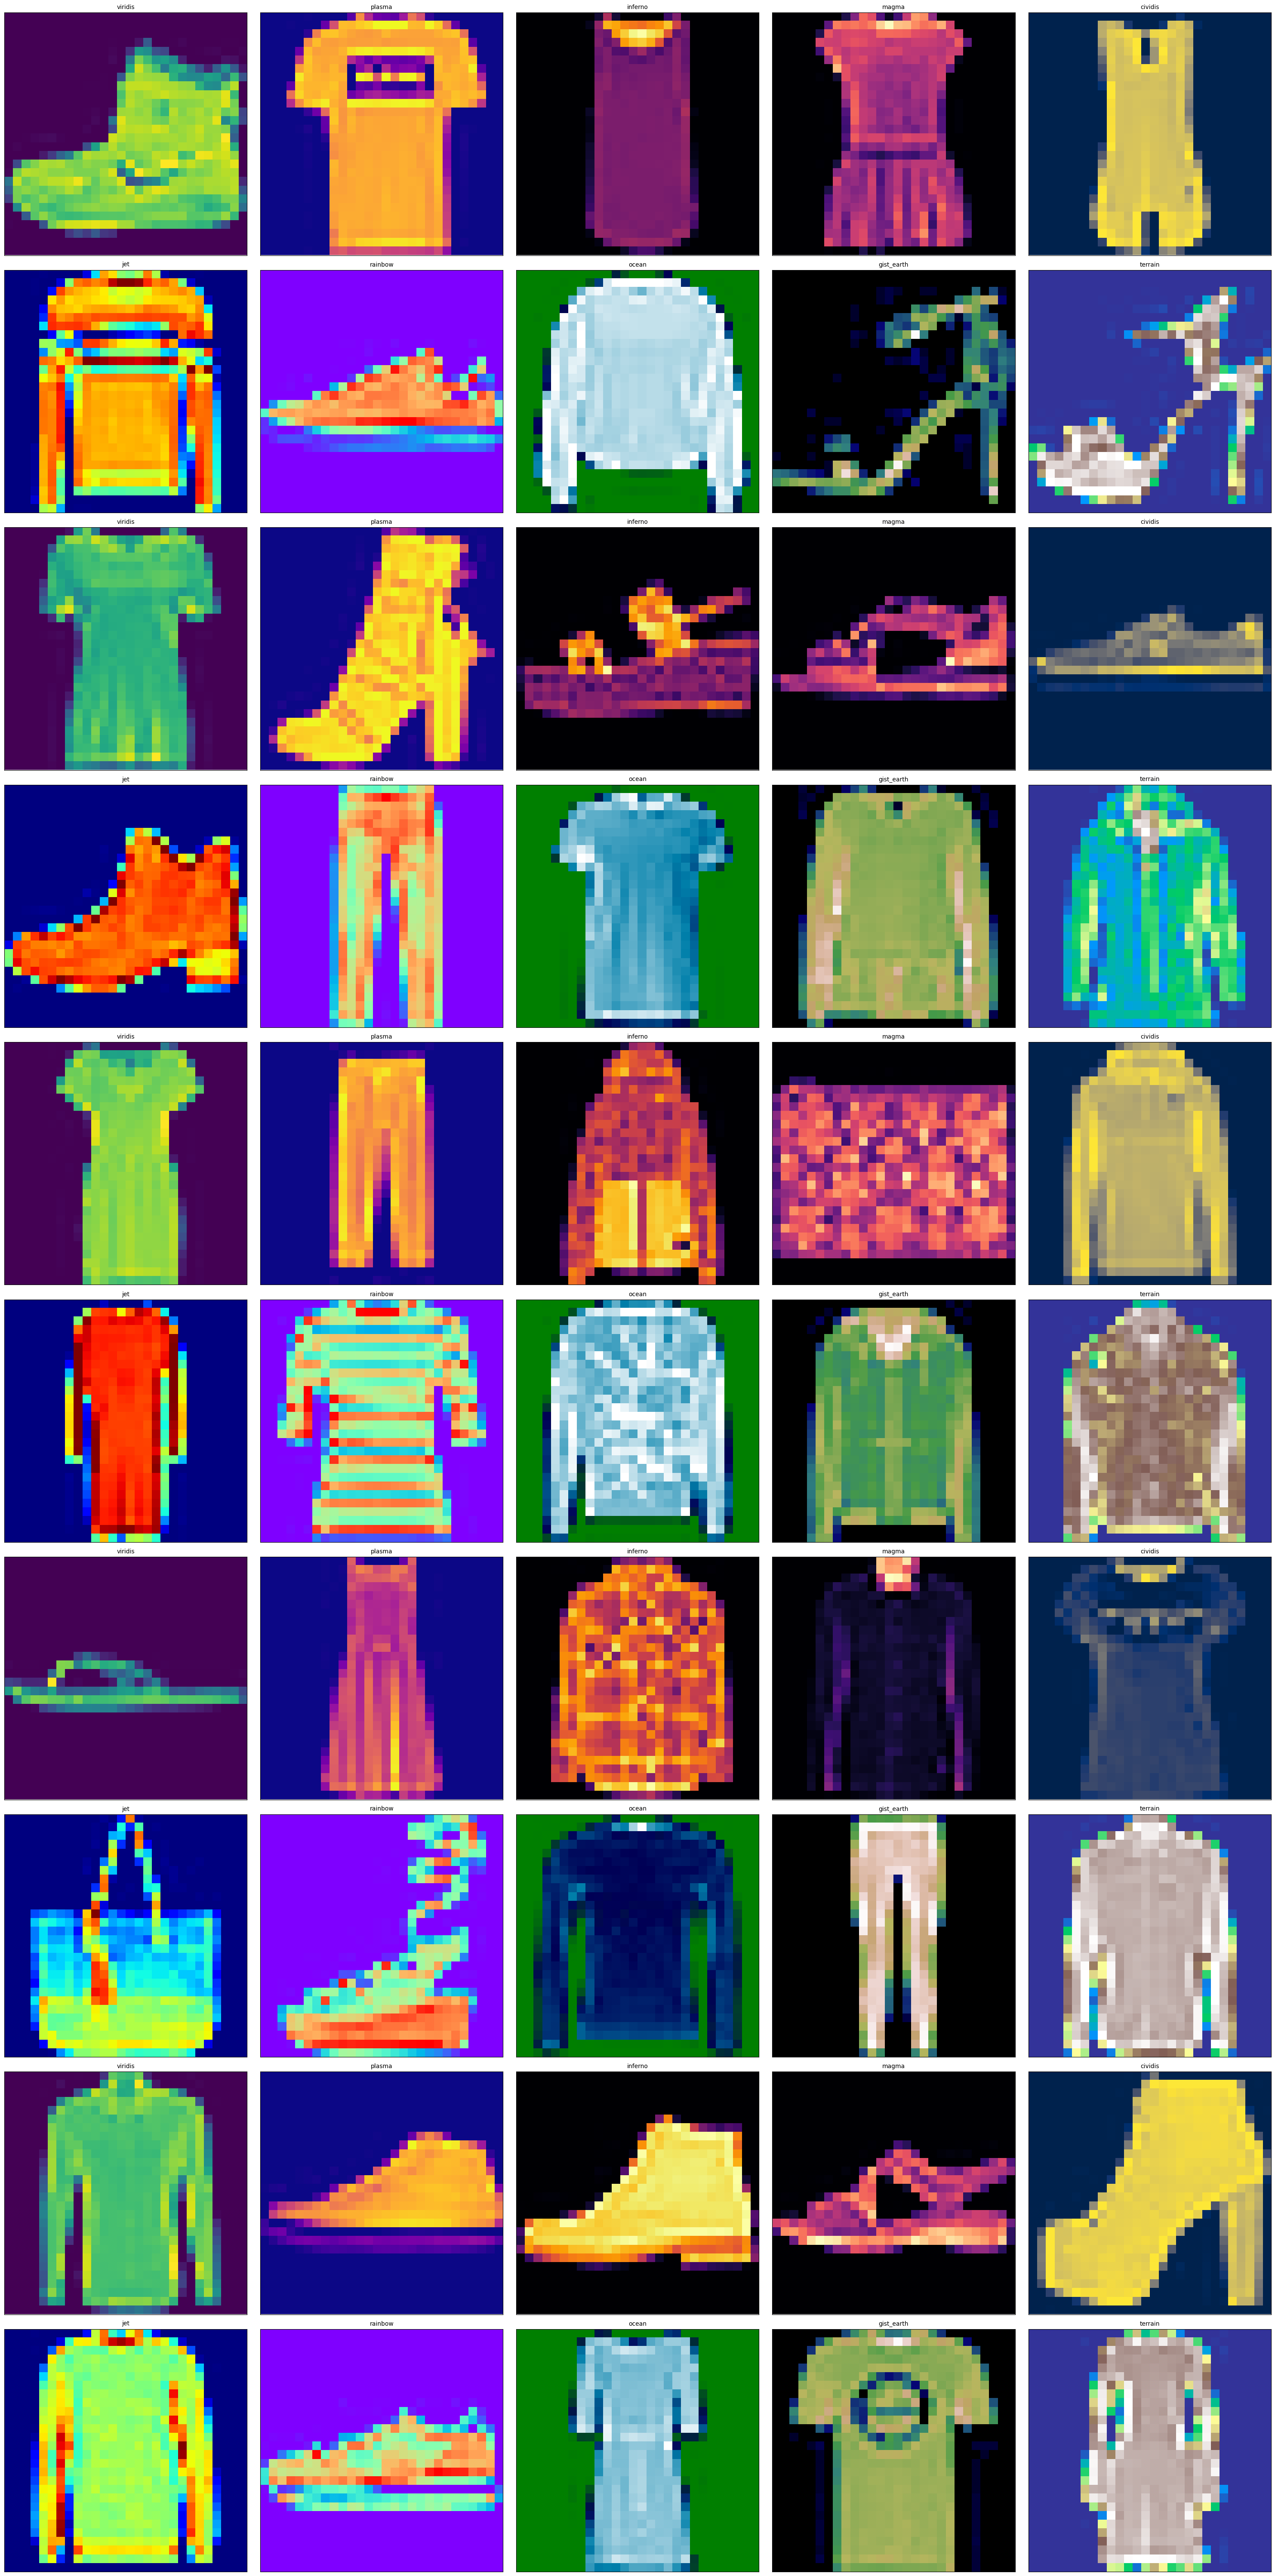

In [18]:
# Visualize images with different colormaps
visualize_images(x_train, num_images=50)

In [19]:

# Flatten and preprocess images
x_train_flat, x_test_flat = preprocess_data(x_train_scaled, x_test_scaled)

In [20]:


# Train K-Nearest Neighbors classifier
train_knn(x_train_flat, y_train, x_test_flat, y_test)


Training accuracy: 0.8998
Test accuracy: 0.8554
F1 score: 0.8546
Recall: 0.8554
Precision: 0.8578
Classification report:
              precision    recall  f1-score   support

           0       0.77      0.85      0.81      1000
           1       0.99      0.97      0.98      1000
           2       0.73      0.82      0.77      1000
           3       0.90      0.86      0.88      1000
           4       0.79      0.77      0.78      1000
           5       0.99      0.82      0.90      1000
           6       0.66      0.57      0.61      1000
           7       0.88      0.96      0.92      1000
           8       0.97      0.95      0.96      1000
           9       0.90      0.97      0.93      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.85     10000
weighted avg       0.86      0.86      0.85     10000



In [21]:
# Train Random Forest classifier
train_random_forest(x_train_flat, y_train, x_test_flat, y_test)

Training accuracy: 0.9999
Test accuracy: 0.8733
F1 score: 0.8717
Recall: 0.8733
Precision: 0.8722
Classification report:
              precision    recall  f1-score   support

           0       0.81      0.86      0.83      1000
           1       0.99      0.96      0.98      1000
           2       0.75      0.81      0.78      1000
           3       0.88      0.90      0.89      1000
           4       0.77      0.81      0.79      1000
           5       0.97      0.96      0.96      1000
           6       0.71      0.57      0.63      1000
           7       0.93      0.95      0.94      1000
           8       0.95      0.97      0.96      1000
           9       0.95      0.95      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



In [22]:
# Train Decision Tree classifier
train_decision_tree(x_train_flat, y_train, x_test_flat, y_test)

Training accuracy: 1.0000
Test accuracy: 0.7902
F1 score: 0.7910
Recall: 0.7902
Precision: 0.7920
Classification report:
              precision    recall  f1-score   support

           0       0.75      0.74      0.75      1000
           1       0.95      0.95      0.95      1000
           2       0.64      0.64      0.64      1000
           3       0.82      0.78      0.80      1000
           4       0.66      0.66      0.66      1000
           5       0.90      0.89      0.89      1000
           6       0.52      0.56      0.54      1000
           7       0.87      0.88      0.88      1000
           8       0.91      0.91      0.91      1000
           9       0.89      0.91      0.90      1000

    accuracy                           0.79     10000
   macro avg       0.79      0.79      0.79     10000
weighted avg       0.79      0.79      0.79     10000



In [23]:
# Train Support Vector Machine classifier
train_svm(x_train_flat, y_train, x_test_flat, y_test)

Training accuracy: 0.9128
Test accuracy: 0.8828
F1 score: 0.8823
Recall: 0.8828
Precision: 0.8823
Classification report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.84      1000
           1       0.99      0.96      0.98      1000
           2       0.79      0.82      0.80      1000
           3       0.87      0.89      0.88      1000
           4       0.81      0.81      0.81      1000
           5       0.96      0.95      0.96      1000
           6       0.72      0.65      0.69      1000
           7       0.93      0.95      0.94      1000
           8       0.97      0.98      0.97      1000
           9       0.96      0.95      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [24]:
# Train XGBoost classifier
train_xgboost(x_train_flat, y_train, x_test_flat, y_test)

Training accuracy: 0.9997
Test accuracy: 0.8985
Classification report:
              precision    recall  f1-score   support

           0       0.84      0.87      0.86      1000
           1       0.99      0.97      0.98      1000
           2       0.81      0.83      0.82      1000
           3       0.90      0.91      0.91      1000
           4       0.82      0.84      0.83      1000
           5       0.99      0.97      0.98      1000
           6       0.74      0.68      0.71      1000
           7       0.95      0.97      0.96      1000
           8       0.98      0.98      0.98      1000
           9       0.96      0.96      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [25]:
# Train Gradient Boosting classifier
train_gradient_boosting(x_train_flat, y_train, x_test_flat, y_test)


Training accuracy: 0.9113
Test accuracy: 0.8681
F1 score: 0.8677
Recall: 0.8681
Precision: 0.8677
Classification report:
              precision    recall  f1-score   support

           0       0.82      0.83      0.82      1000
           1       0.99      0.96      0.97      1000
           2       0.75      0.78      0.77      1000
           3       0.86      0.89      0.87      1000
           4       0.77      0.79      0.78      1000
           5       0.97      0.95      0.96      1000
           6       0.68      0.62      0.65      1000
           7       0.93      0.94      0.94      1000
           8       0.96      0.96      0.96      1000
           9       0.95      0.95      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000

